In [1]:
from brainmri.dataset.stacker import MriStacker
from brainmri.dataset.dataset import *
from brainmri.runner.train import train_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import segmentation_models_pytorch as smp

In [2]:
config = {
     'make_stacks': True,
     'stack_size': 3,
     'data_dir': './data/lgg-mri-segmentation/kaggle_3m/',
     'out_dir': './data/lgg-mri-segmentation/2.5D/StackSize=3',
     'model_out_pth': './models/fpn-resnet18_aug_{date}.pth',
     'augmentations': True,
     'epochs': 75,
     'batch_size': 64,
     'lr': 5e-05,
     'optimizer': 'adam',
     'model': 'fpn',
     'model_encoder': 'resnet18',
     'model_act': 'sigmoid',
     'encoder_weights': 'imagenet',
     'device': 'cuda',
     'num_classes': 1
}

In [3]:
stacker = MriStacker(root_dir=config.get("data_dir"),
                         out_dir=config.get("out_dir"),
                         stack_size=config.get("stack_size"))

if config.get("make_stacks"):
    stacker.process_patients()

stacker.gen_train_val_test_split()


preprocessing_fn = get_preprocessing_fn(config.get("model_encoder"), config.get("encoder_weights"))
train_ds = BrainMriSegmentation(stacker.train_df, config.get("stack_size"),
                                transforms=get_augmentations(is_train=True, apply_transforms=config.get("augmentations")),
                                preprocessing=get_preprocessing(preprocessing_fn))
valid_ds = BrainMriSegmentation(stacker.valid_df, config.get("stack_size"),
                                transforms=None, preprocessing=get_preprocessing(preprocessing_fn))

train_dl = get_dataloader(train_ds, bs=config.get("batch_size"))
valid_dl = get_dataloader(valid_ds, bs=config.get("batch_size"))

train_loss, val_loss, train_fscore, val_fscore, train_iou, val_iou  = train_model(config, train_dl, valid_dl)


/home/nlittlefield/.local/lib/python3.6/site-packages/albumentations/augmentations/transforms.py:1741: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  warnings.warn('Using lambda is incompatible with multiprocessing. '


Training fpn w/ resnet18 backbone
Let's use 2 GPUs!

Epoch: 0
valid: 100%|██████████| 10/10 [00:01<00:00,  5.48it/s, dice_loss - 0.6003, iou_score - 0.2637, fscore - 0.4146]
Model saved!

Epoch: 1
valid: 100%|██████████| 10/10 [00:01<00:00,  5.49it/s, dice_loss - 0.4569, iou_score - 0.3842, fscore - 0.5522]
Model saved!

Epoch: 2
valid: 100%|██████████| 10/10 [00:01<00:00,  5.53it/s, dice_loss - 0.3872, iou_score - 0.4508, fscore - 0.6198]
Model saved!

Epoch: 3
valid: 100%|██████████| 10/10 [00:01<00:00,  5.59it/s, dice_loss - 0.3508, iou_score - 0.489, fscore - 0.655] 
Model saved!

Epoch: 4
valid: 100%|██████████| 10/10 [00:01<00:00,  5.36it/s, dice_loss - 0.3492, iou_score - 0.4889, fscore - 0.6557]
Model saved!

Epoch: 5
valid: 100%|██████████| 10/10 [00:01<00:00,  5.45it/s, dice_loss - 0.3432, iou_score - 0.4966, fscore - 0.6616]
Model saved!

Epoch: 6
valid: 100%|██████████| 10/10 [00:01<00:00,  5.33it/s, dice_loss - 0.341, iou_score - 0.4986, fscore - 0.6637]
Model saved!

Epoc

valid: 100%|██████████| 10/10 [00:01<00:00,  5.51it/s, dice_loss - 0.1905, iou_score - 0.6905, fscore - 0.8162]

Epoch: 34
valid: 100%|██████████| 10/10 [00:01<00:00,  5.41it/s, dice_loss - 0.1545, iou_score - 0.7411, fscore - 0.8509]

Epoch: 35
valid: 100%|██████████| 10/10 [00:01<00:00,  5.41it/s, dice_loss - 0.1505, iou_score - 0.7466, fscore - 0.8546]
Model saved!

Epoch: 36
valid: 100%|██████████| 10/10 [00:01<00:00,  5.48it/s, dice_loss - 0.1631, iou_score - 0.7274, fscore - 0.8415]

Epoch: 37
valid: 100%|██████████| 10/10 [00:01<00:00,  5.40it/s, dice_loss - 0.1555, iou_score - 0.7391, fscore - 0.8499]

Epoch: 38
valid: 100%|██████████| 10/10 [00:01<00:00,  5.57it/s, dice_loss - 0.1497, iou_score - 0.7471, fscore - 0.855]
Model saved!

Epoch: 39
valid: 100%|██████████| 10/10 [00:01<00:00,  5.40it/s, dice_loss - 0.1476, iou_score - 0.7507, fscore - 0.8575]
Model saved!

Epoch: 40
valid: 100%|██████████| 10/10 [00:01<00:00,  5.72it/s, dice_loss - 0.149, iou_score - 0.748, fscore -

valid: 100%|██████████| 10/10 [00:01<00:00,  5.27it/s, dice_loss - 0.1331, iou_score - 0.7719, fscore - 0.871]

Epoch: 68
valid: 100%|██████████| 10/10 [00:01<00:00,  5.48it/s, dice_loss - 0.1411, iou_score - 0.7597, fscore - 0.8625]

Epoch: 69
valid: 100%|██████████| 10/10 [00:01<00:00,  5.48it/s, dice_loss - 0.1386, iou_score - 0.7635, fscore - 0.8656]

Epoch: 70
valid: 100%|██████████| 10/10 [00:01<00:00,  5.32it/s, dice_loss - 0.1489, iou_score - 0.7495, fscore - 0.8548]

Epoch: 71
valid: 100%|██████████| 10/10 [00:01<00:00,  5.34it/s, dice_loss - 0.1246, iou_score - 0.784, fscore - 0.8785]
Model saved!

Epoch: 72
valid: 100%|██████████| 10/10 [00:01<00:00,  5.56it/s, dice_loss - 0.1341, iou_score - 0.7693, fscore - 0.8692]

Epoch: 73
valid: 100%|██████████| 10/10 [00:01<00:00,  5.52it/s, dice_loss - 0.1405, iou_score - 0.7609, fscore - 0.8631]

Epoch: 74
valid: 100%|██████████| 10/10 [00:01<00:00,  5.46it/s, dice_loss - 0.1339, iou_score - 0.7698, fscore - 0.8695]


In [4]:
import torch.nn
best_model = torch.load("./models/fpn-resnet18_aug_2021-08-23.pth")

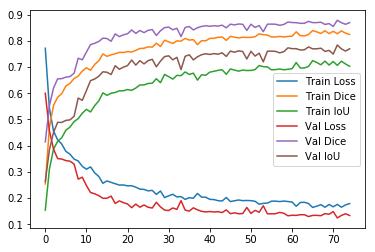

In [5]:
plt.plot(train_loss)
plt.plot(train_fscore)
plt.plot(train_iou)
plt.plot(val_loss)
plt.plot(val_fscore)
plt.plot(val_iou)                                                                                

plt.legend(["Train Loss",  "Train Dice", "Train IoU", "Val Loss", "Val Dice", "Val IoU"])

In [6]:
test_ds = BrainMriSegmentation(stacker.test_df, config.get("stack_size"),
                                transforms=None, preprocessing=get_preprocessing(preprocessing_fn))
test_dl = get_dataloader(test_ds, bs=config.get("batch_size"))

In [7]:
loss = smp.utils.losses.DiceLoss()
metrics = [smp.utils.metrics.IoU(threshold=0.5), smp.utils.metrics.Fscore(threshold=0.5)]
    
test_epoch =  smp.utils.train.ValidEpoch(
    best_model,s
    loss=loss,
    metrics=metrics,
    device=config.get("device"),s
    verbose=True
)

In [8]:
test_epoch.run(test_dl)

valid: 100%|██████████| 6/6 [00:01<00:00,  5.92it/s, dice_loss - 0.1501, iou_score - 0.746, fscore - 0.8542] 


{'dice_loss': 0.15014960368474325,
 'iou_score': 0.7459651132424673,
 'fscore': 0.8541977008183798}